In [1]:
import numpy as np
import matplotlib.pyplot as plt

nhập các hàm phi

In [2]:
#nhập các hàm phi
def phi(x):
    return [x, np.sin(x)]

In [3]:
def doc_input (ten_file):
    print("======================================================")
    print("Kieu du lieu dau vao: ")
    print("1. Ngang")
    print("2. Doc")
    chon = int(input("chon kieu dau vao: "))
    if(chon == 1):
        # doc file input.txt
        inp = open(ten_file, "r")
        # doc du lieu cua x va y
        x = inp.readline()
        y = inp.readline()
        # xu ly du lieu cua x va y
        x = x.strip().split()
        x = np.array(x, dtype=float)
        if (y == ""):
            y = f(x)
            y = np.array(y, dtype=float)
            inp.close()
        else:
            y = y.strip().split()
            y = np.array(y, dtype=float)
            inp.close()
    else:
        x = list()
        y = list()
        f = open("input.txt")
        for z in f:
            z = z.strip().split()
            x.append(float(z[0]))
            y.append(float(z[1]))
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)

    return x, y

def kiem_tra_input (x, y):
    #tra ve 1 khi input hop le va 0 khi input khong hop le
    # kiem tra kich thuoc du lieu
    if (x.shape[0] != y.shape[0]):
        print("kich thuoc khong hop le")
        return 0
    
    # kiem tra du lieu trung
    for i in x:
        if (np.where(x == i)[0].shape[0] > 1):
            print("du lieu cua x o cac vi tri ", np.where(x == i)[0], " trung nhau")
            return 0
    # input hop le
    print("input hop le")
    return 1

Ma trận $M$:
$$
M = 
\begin{pmatrix}
phi_1(x_1) & \cdots & phi_m(x_1) \\
\vdots & \ddots & \vdots \\
phi_1(x_n) & \cdots & phi_m(x_n)
\end{pmatrix}
$$

In [4]:
def M(x):
    Phi = list()
    for i in range(len(x)):
        Phi.append(phi(x[i]))
    return np.array(Phi)

Hệ số ước lượng và công thức sai số:\
====================================================================\
Hệ số ước lượng: $\displaystyle a = (M^TM)^{-1}M^TY$\
Công thức sai số: $\displaystyle \sigma = \sqrt{\frac{1}{n}[y_i - \phi(x_i)]^2}$

In [5]:
# tính hệ số bằng bình phương cực tiểu
def bpcu_tieu(x, y):
    Phi = M(x)
    Phi_T = Phi.T
    a = np.dot(Phi_T, Phi)
    b = np.dot(Phi_T, y)
    print("======================================================")
    print("Ma tran he so M^T.M: \n", a)
    print("======================================================")
    print("Ma tran he so M^T.y: \n", b)
    print("======================================================")
    print("Ma tran nghịch đảo M^T: \n", np.linalg.inv(a))
    print("======================================================")
    return np.linalg.solve(a, b)

Trường hợp $y = \displaystyle ae^{b_1\phi_1 + b_2\phi_2 + ... + b_n\phi_n}$\
Ta sẽ đưa về dạng: $\ln y = \ln a + b_1\phi_1 + b_2\phi_2 + ... + b_n\phi_n = A + b_1\phi_1 + b_2\phi_2 + ... + b_n\phi_n$\
Ma trân M sẽ là:
$$
M = 
\begin{pmatrix}
1 & phi_1(x_1) & \cdots & phi_m(x_1) \\
\vdots & \ddots & \ddots & \vdots \\
1 & phi_1(x_n) & \cdots & phi_m(x_n)
\end{pmatrix}
$$
Hệ số $a = e^A$

In [6]:
# trường hợp ham y = a*exp(b1*phi1(x) + b2*phi2(x) + ...)
def ham_mu(x, y):
    if(np.all(y > 0)):
        return bpcu_tieu(x, np.log(y)), 1
    elif(np.all(y < 0)):
        return bpcu_tieu(x, np.log(-y)), -1
    else:
        print("khong the tinh")
        return 0

Trường hợp $y = \displaystyle ax^b$\
Ta sẽ đưa về dạng: $\ln y = \ln a + b\ln (x) = A + b\ln (x)$\
Ma trân M sẽ là:
$$
M = 
\begin{pmatrix}
1 & \ln (x_1)\\
\vdots & \vdots \\
1 & \ln (x_n)
\end{pmatrix}
$$
Hệ số $a = e^A$

In [7]:
# trường hợp ham y = a*x^b
def ham_luy_thua(x, y):
    if(np.all(y > 0) and np.all(x > 0)):
        return bpcu_tieu(x, np.log(y)), 1
    elif(np.all(y < 0) and np.all(x > 0)):
        return bpcu_tieu(x, np.log(-y)), -1
    else:
        print("khong the tinh")
        return 0

Trường hợp $y = \ln (b_1\phi_1 + b_2\phi_2 + ... + b_n\phi_n)$\
Ta sẽ đưa về dạng: $e^y = b_1\phi_1 + b_2\phi_2 + ... + b_n\phi_n$

In [8]:
# trường hợp ham y = ln(a1*phi1(x) + a2*phi2(x) + ...)
def ham_ln(x, y):
    return bpcu_tieu(x, np.exp(y))

In [9]:
# vẽ đồ thị
def ve_do_thi(x, y, a, kieu, sgn):
    plt.plot(x, y, 'ro')
    # vẽ đường thẳng
    x1 = np.linspace(x[0], x[-1], int(100*(x[-1] - x[0])))
    if (kieu == 1):
        y1 = np.exp(np.dot(M(x1), a))*sgn
    elif (kieu == 2):
        y1 = np.exp(np.dot(M(x1), a))*sgn
    elif (kieu == 3):
        y1 = np.log(np.dot(M(x1), a))
    else:
        y1 = np.dot(M(x1), a)
    plt.plot(x1, y1, 'b-')
    plt.show()

Chạy chương trình

Kieu du lieu dau vao: 
1. Ngang
2. Doc
input hop le
Kieu ham so: 
1. y = a*exp(b1*phi1(x) + b2*phi2(x) + ...)
2. y = a*x^b
3. y = ln(a1*phi1(x) + a2*phi2(x) + ...)
4. y = a1*phi1(x) + a2*phi2(x) + ... + an*phin(x)
Ma tran he so M^T.M: 
 [[11359.9          122.64119876]
 [  122.64119876    75.29297485]]
Ma tran he so M^T.y: 
 [11502.97433579   210.48314703]
Ma tran nghịch đảo M^T: 
 [[ 8.96046468e-05 -1.45952811e-04]
 [-1.45952811e-04  1.35191873e-02]]
He so cua ham so: 
a =  [0.99999935 1.16666965]
Sai so: 6.799864445388721e-05


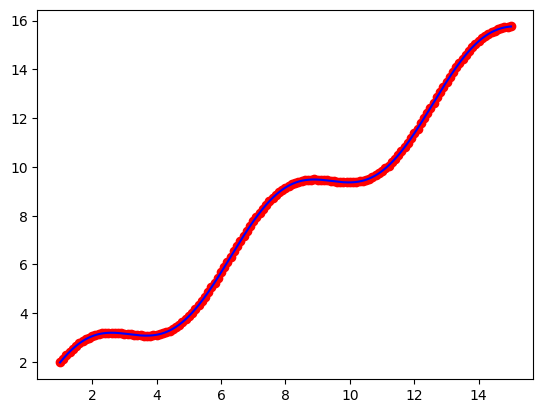

ValueError: could not convert string to float: ''

In [10]:
# chay chuong trinh
x, y = doc_input("input.txt")
if (kiem_tra_input(x, y) == 1):
    print("======================================================")
    print("Kieu ham so: ")
    print("1. y = a*exp(b1*phi1(x) + b2*phi2(x) + ...)")
    print("2. y = a*x^b")
    print("3. y = ln(a1*phi1(x) + a2*phi2(x) + ...)")
    print("4. y = a1*phi1(x) + a2*phi2(x) + ... + an*phin(x)")
    chon = int(input("chon kieu ham so: "))
    if(chon == 1):
        a, sgn = ham_mu(x, y)
        print("======================================================")
        print("He so cua ham so: ")
        print("a = ", np.exp(a[0])*sgn)
        print("b = ", a[1:])
        print("======================================================")
        print("Sai so: {}".format(np.sqrt(np.sum((y - np.exp(np.dot(M(x), a))*sgn)**2) / x.shape[0])))
        ve_do_thi(x, y, a, chon, sgn)
        while(True):
            x = float(input("Nhap gia tri x can tinh: "))
            print("y = {}".format(np.exp(np.dot(phi(x), a))*sgn))
    elif(chon == 2):
        a, sgn = ham_luy_thua(x, y)
        print("======================================================")
        print("He so cua ham so: ")
        print("a = ", np.exp(a[0])*sgn)
        print("b = ", a[1])
        print("======================================================")
        print("Sai so: {}".format(np.sqrt(np.sum((y - np.exp(np.dot(M(x), a))*sgn)**2) / x.shape[0])))
        ve_do_thi(x, y, a, chon, sgn)
        while(True):
            x = float(input("Nhap gia tri x can tinh: "))
            print("y = {}".format(np.exp(np.dot(phi(x), a))*sgn))
    elif(chon == 3):
        a = ham_ln(x, y)
        print("======================================================")
        print("He so cua ham so: ")
        print("a = ", a)
        print("======================================================")
        print("Sai so: {}".format(np.sqrt(np.sum((y - np.log(np.dot(M(x), a)))**2) / x.shape[0])))
        ve_do_thi(x, y, a, chon, 0)
        while(True):
            x = float(input("Nhap gia tri x can tinh: "))
            print("y = {}".format(np.log(np.dot(phi(x), a))))
    elif(chon == 4):
        a = bpcu_tieu(x, y)
        print("======================================================")
        print("He so cua ham so: ")
        print("a = ", a)
        print("======================================================")
        print("Sai so: {}".format(np.sqrt(np.sum((y - np.dot(M(x), a))**2) / x.shape[0])))
        ve_do_thi(x, y, a, chon, 0)
        while(True):
            x = float(input("Nhap gia tri x can tinh: "))
            print("y({}) = {}".format(x, np.dot(phi(x), a)))
    else:
        print("khong co lua chon nay")
    

Thuật toán:\
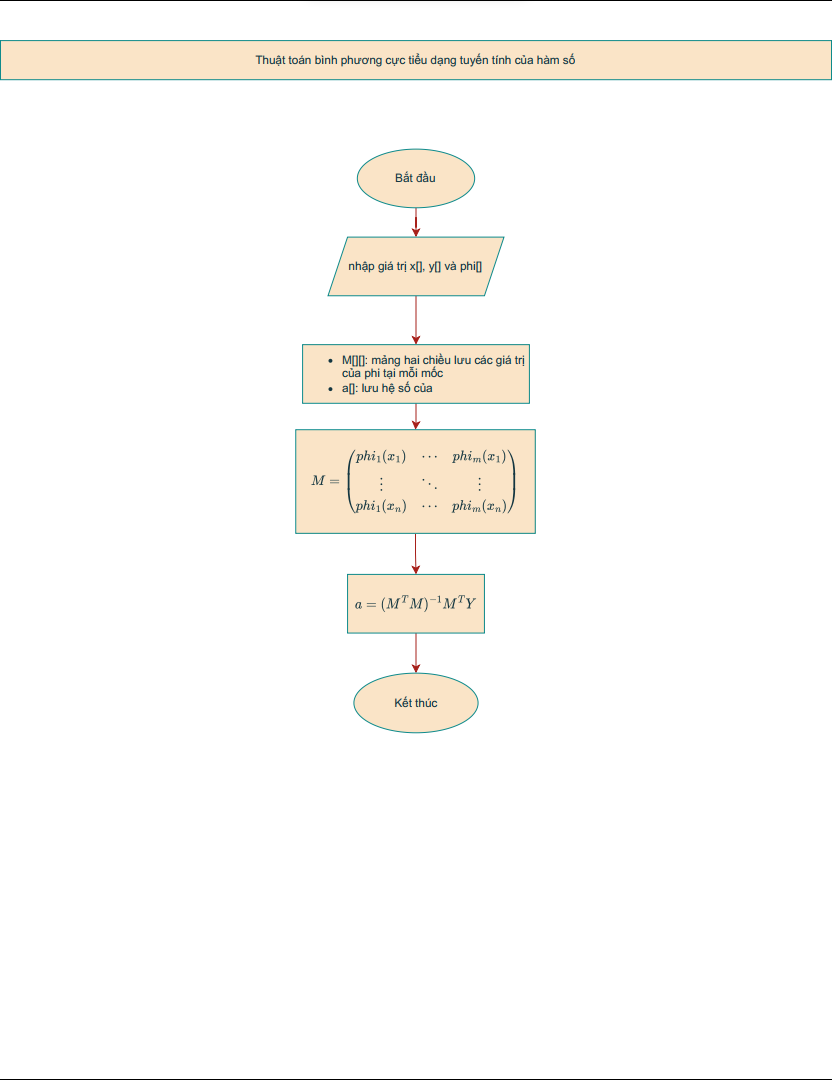\
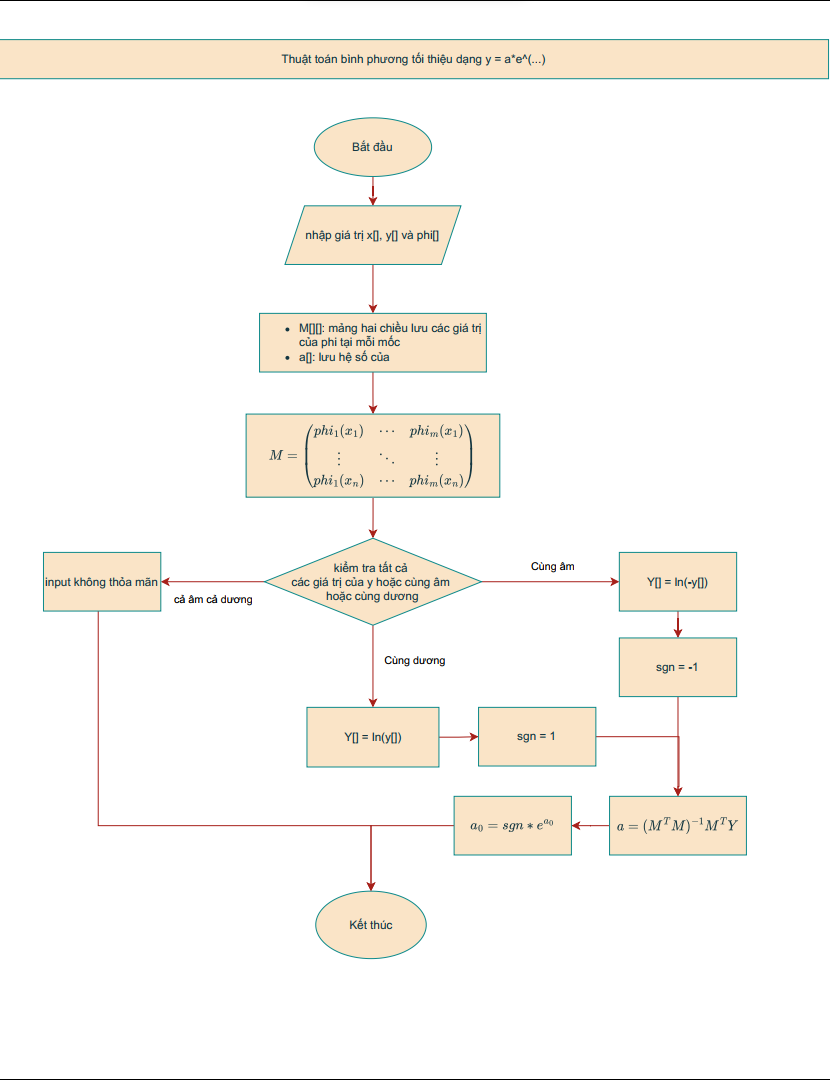\
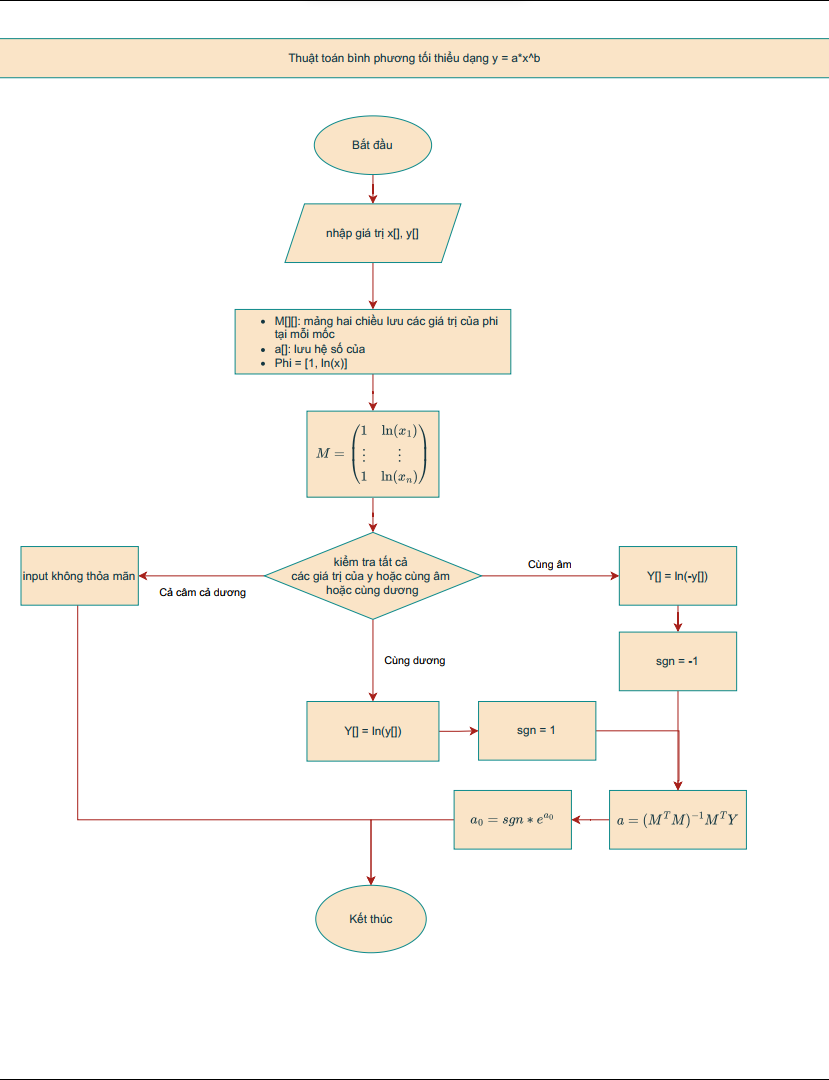\
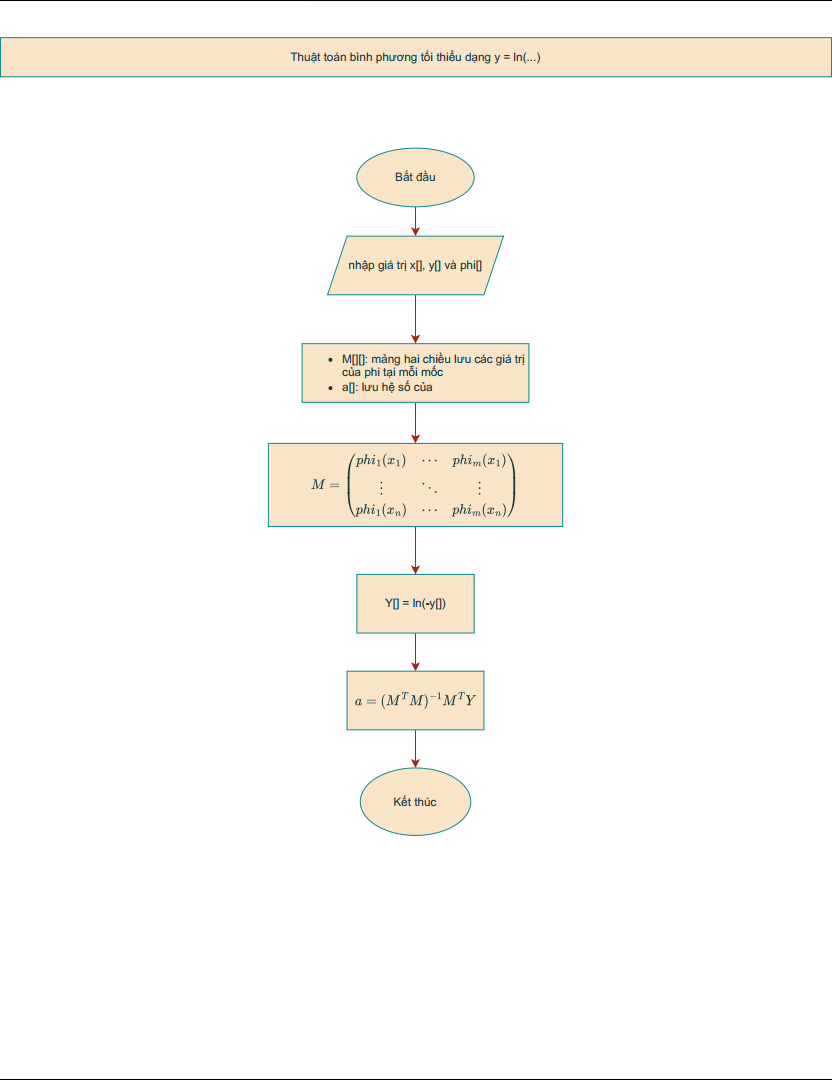